In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/psi_base_test_remove_b.nc")
ocean_data=xr.open_dataset("../BBL_w_O_updated_diagnostics_TKE_terms.nc") #i=103

In [5]:
ocean_data.k

<xarray.DataArray 'k' (time: 5152, zC: 100, yC: 1, xF: 500)> Size: 2GB
[257600000 values with dtype=float64]
Coordinates:
  * zC       (zC) float64 800B 1.0 3.0 5.0 7.0 9.0 ... 193.0 195.0 197.0 199.0
  * xF       (xF) float64 4kB 0.0 4.0 8.0 12.0 ... 1.988e+03 1.992e+03 1.996e+03
  * yC       (yC) float64 8B 1.0
  * time     (time) timedelta64[ns] 41kB 00:00:00 ... 18 days 04:19:56.350719492

In [6]:
# u = ocean_data.u#+ocean_data.U
# v = ocean_data.v#+ocean_data.V
# b = ocean_data.B
# # B = ocean_data.B
# w = ocean_data.w

In [7]:
KE_spatial_average_time_series = ocean_data.k.mean(dim=['xF','yC','zC'])
KE_spatial_average_time_series

<xarray.DataArray 'k' (time: 5152)> Size: 41kB
array([9.95309422e-09, 8.87687966e-09, 7.50180062e-09, ...,
       2.68140197e-05, 2.68383589e-05, 2.68488447e-05])
Coordinates:
  * time     (time) timedelta64[ns] 41kB 00:00:00 ... 18 days 04:19:56.350719492

In [8]:
KE_t_spatial_average_time_series = ocean_data.KE.mean(dim=['xC','yC','zC'])
KE_t_spatial_average_time_series

<xarray.DataArray 'KE' (time: 5152)> Size: 41kB
array([9.95309422e-09, 8.87687966e-09, 7.50180062e-09, ...,
       2.68140197e-05, 2.68383589e-05, 2.68488447e-05])
Coordinates:
  * time     (time) timedelta64[ns] 41kB 00:00:00 ... 18 days 04:19:56.350719492

In [9]:
inertial_period = KE_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-8+1e-4*1e-5)**(0.5)/(2*np.pi)
KE_spatial_average_time_series_ip = KE_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))

In [10]:
inertial_period.data

array([0.00000000e+00, 5.24404432e-03, 1.04880886e-02, ...,
       2.62097335e+01, 2.62149776e+01, 2.62202216e+01])

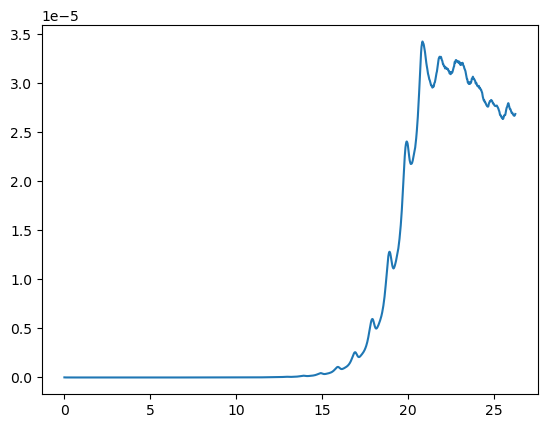

In [11]:
plt.plot(KE_spatial_average_time_series_ip.intp,KE_spatial_average_time_series_ip.values)
plt.show()

In [12]:
timeKE = KE_spatial_average_time_series.time
timeKE*1e-9

<xarray.DataArray 'time' (time: 5152)> Size: 41kB
array([      0,     314,     628, ..., 1570168, 1570482, 1570796],
      dtype='timedelta64[ns]')
Coordinates:
  * time     (time) timedelta64[ns] 41kB 00:00:00 ... 18 days 04:19:56.350719492

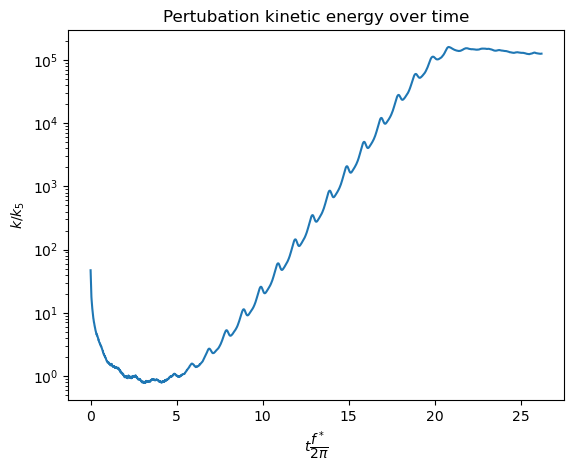

In [13]:
plt.plot(KE_spatial_average_time_series_ip.intp,KE_spatial_average_time_series_ip.values/KE_spatial_average_time_series_ip.values[991])
plt.title("Pertubation kinetic energy over time")
plt.ylabel('$k$/$k_5$')
plt.xlabel('$t\dfrac{f^*}{2\pi}$')
plt.yscale('log')
plt.show()

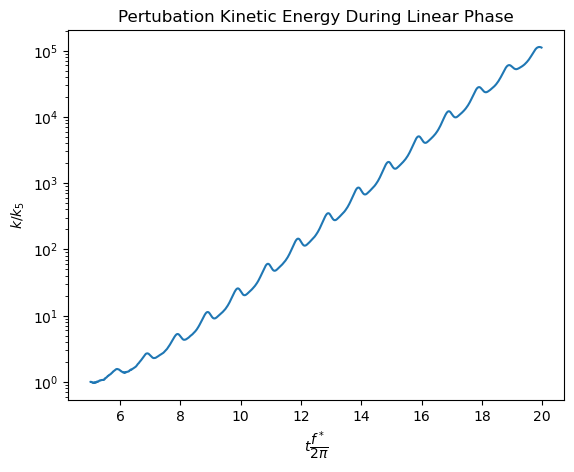

In [14]:
ts = 991
tf = 3895
plt.plot(KE_spatial_average_time_series_ip.intp[ts:tf],KE_spatial_average_time_series_ip.values[ts:tf]/KE_spatial_average_time_series_ip.values[ts])
plt.title("Pertubation Kinetic Energy During Linear Phase")
plt.ylabel('$k$/$k_5$')
plt.xlabel('$t\dfrac{f^*}{2\pi}$')
plt.yscale('log')
plt.show()

In [15]:
ocean_data

<xarray.Dataset> Size: 14GB
Dimensions:  (zC: 100, zF: 101, xC: 500, yF: 1, xF: 500, yC: 1, time: 5152)
Coordinates:
  * zC       (zC) float64 800B 1.0 3.0 5.0 7.0 9.0 ... 193.0 195.0 197.0 199.0
  * zF       (zF) float64 808B 0.0 2.0 4.0 6.0 8.0 ... 194.0 196.0 198.0 200.0
  * xC       (xC) float64 4kB 2.0 6.0 10.0 14.0 ... 1.99e+03 1.994e+03 1.998e+03
  * yF       (yF) float64 8B 1.0
  * xF       (xF) float64 4kB 0.0 4.0 8.0 12.0 ... 1.988e+03 1.992e+03 1.996e+03
  * yC       (yC) float64 8B 1.0
  * time     (time) timedelta64[ns] 41kB 00:00:00 ... 18 days 04:19:56.350719492
Data variables:
    BFLUX    (time, zC, yC, xF) float64 2GB ...
    AGSP     (time, zC, yC, xF) float64 2GB ...
    PWORK    (time, zC, yC, xC) float64 2GB ...
    KE       (time, zC, yC, xC) float64 2GB 9.09e-09 1.962e-09 ... 9.61e-07
    k        (time, zC, yC, xF) float64 2GB 1.455e-08 4.542e-09 ... 9.77e-07
    GSP      (time, zC, yF, xC) float64 2GB ...
    E        (time, zC, yC, xC) float64 2GB ...
Attributes:
    interval:              314.1592701438986
    Oceananigans:          This file was generated using Oceananigans v0.90.8
    Julia:                 This file was generated using Julia Version 1.9.2\...
    output time interval:  Output was saved every 5.236 minutes.
    date:                  This file was generated on 2024-06-05T11:44:29.276.
    schedule:              TimeInterval

In [16]:
AGSP_spatial_average_time_series = ocean_data.AGSP.mean(dim=['xF','yC','zC'])
inertial_period = AGSP_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
AGSP_spatial_average_time_series_ip = AGSP_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))


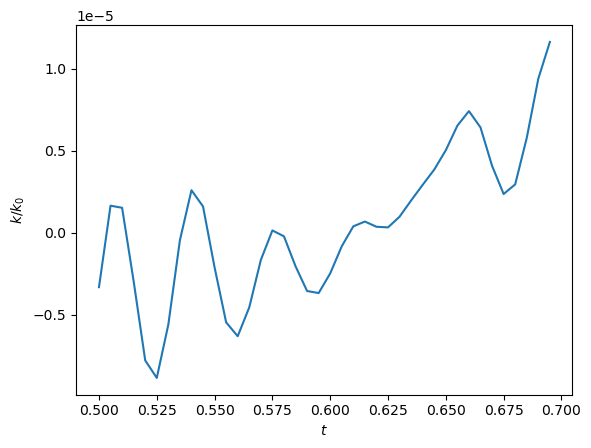

In [17]:
plt.plot(AGSP_spatial_average_time_series_ip.intp[100:140],AGSP_spatial_average_time_series_ip.values[100:140]/KE_spatial_average_time_series_ip.values[100:140])
plt.ylabel('$k$/$k_0$')
plt.xlabel('$t$')
# plt.yscale('log')
plt.show()

In [18]:
GSP_spatial_average_time_series = ocean_data.GSP.mean(dim=['xC','yF','zC'])
inertial_period = GSP_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
GSP_spatial_average_time_series_ip = GSP_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))


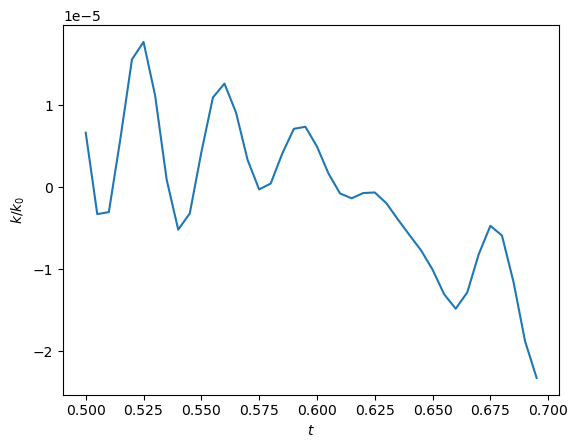

In [19]:
plt.plot(GSP_spatial_average_time_series_ip.intp[100:140],GSP_spatial_average_time_series_ip.values[100:140]/KE_spatial_average_time_series_ip.values[100:140])
plt.ylabel('$k$/$k_0$')
plt.xlabel('$t$')
# plt.yscale('log')
plt.show()

In [20]:
BFLUX_spatial_average_time_series = ocean_data.BFLUX.mean(dim=['xF','yC','zC'])
inertial_period = BFLUX_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
BFLUX_spatial_average_time_series_ip = BFLUX_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))


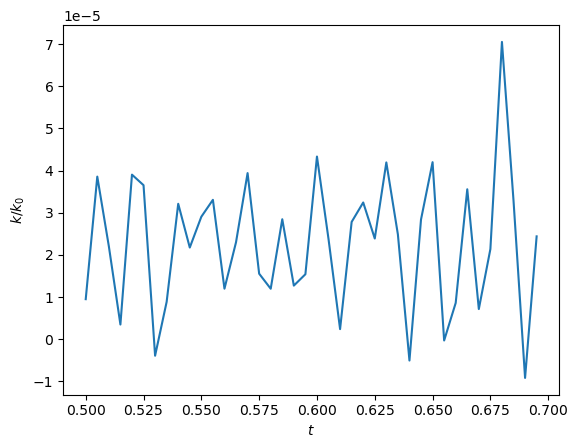

In [21]:
plt.plot(BFLUX_spatial_average_time_series_ip.intp[100:140],BFLUX_spatial_average_time_series_ip.values[100:140]/KE_spatial_average_time_series_ip.values[100:140])
plt.ylabel('$k$/$k_0$')
plt.xlabel('$t$')
# plt.yscale('log')
plt.show()

In [23]:
E_spatial_average_time_series = ocean_data.E.mean(dim=['xC','yC','zC'])
inertial_period = E_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
E_spatial_average_time_series_ip = E_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))


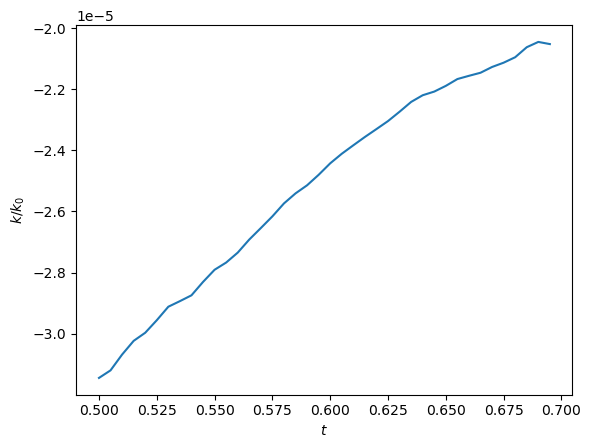

In [24]:
plt.plot(E_spatial_average_time_series_ip.intp[100:140],-1*E_spatial_average_time_series_ip.values[100:140]/KE_spatial_average_time_series_ip.values[100:140])
plt.ylabel('$k$/$k_0$')
plt.xlabel('$t$')
# plt.yscale('log')
plt.show()

In [25]:
PWORK_spatial_average_time_series = ocean_data.PWORK.mean(dim=['xC','yC','zC'])
inertial_period = PWORK_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
PWORK_spatial_average_time_series_ip = PWORK_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))

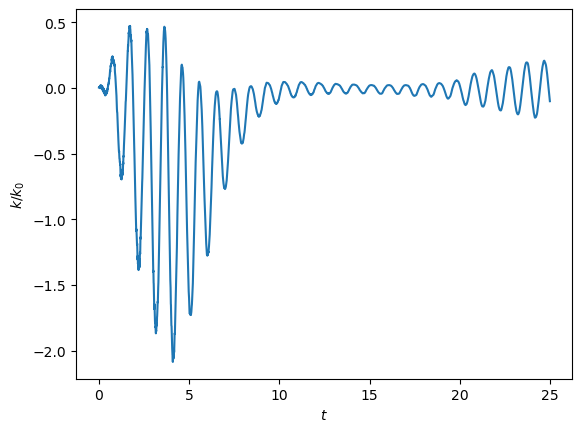

In [26]:
plt.plot(PWORK_spatial_average_time_series_ip.intp,1e4*PWORK_spatial_average_time_series_ip.values/KE_spatial_average_time_series_ip.values)
plt.ylabel('$k$/$k_0$')
plt.xlabel('$t$')
# plt.yscale('log')
plt.show()

In [27]:
KE_turb = ocean_data.k.mean(dim=['xF','yC','zC'])
KE_turb


<xarray.DataArray 'k' (time: 5152)> Size: 41kB
array([9.95309422e-09, 8.87687966e-09, 7.50180062e-09, ...,
       2.68140197e-05, 2.68383589e-05, 2.68488447e-05])
Coordinates:
  * time     (time) timedelta64[ns] 41kB 00:00:00 ... 18 days 04:19:56.350719492

In [28]:
ts = 120
tf = 2061
KE_turb = ocean_data.k.mean(dim=['xF','yC','zC'])
seconds = KE_turb.time/pd.Timedelta("1s")
inertial_period = KE_turb.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
KE_turb_ip = KE_turb.assign_coords(intp = ('time',inertial_period.data))
KE_turb_ip = KE_turb_ip.assign_coords(sec = ('time',seconds.data))
# seconds = KE_spatial_average_time_series.time/pd.Timedelta("1s")
# inertial_period = KE_spatial_average_time_series.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
# KE_spatial_average_time_series_s= KE_spatial_average_time_series.assign_coords(sec = ('time',seconds.data))
# KE_spatial_average_time_series_intp = KE_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))
dkdt = KE_turb_ip.differentiate(coord='sec',edge_order=2)
# np.gradient(KE_spatial_average_time_series_ip,KE_spatial_average_time_series_ip.time)
plt.plot(inertial_period[100:140],dkdt[100:140]/KE_spatial_average_time_series_s[100:140])


/glade/u/apps/jupyterhub/jh-23.11/lib/python3.10/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/glade/u/apps/jupyterhub/jh-23.11/lib/python3.10/site-packages/numpy/lib/function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/glade/u/apps/jupyterhub/jh-23.11/lib/python3.10/site-packages/numpy/lib/function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/glade/u/apps/jupyterhub/jh-23.11/lib/python3.10/site-packages/numpy/lib/function_base.py:1250: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


NameError: name 'KE_spatial_average_time_series_s' is not defined

In [29]:
dkdt

<xarray.DataArray 'k' (time: 5152)> Size: 41kB
array([-2.95003970e-12, -3.90135488e-12, -3.60491180e-12, ...,
        8.35168660e-11,  5.54256957e-11,  1.13291492e-11])
Coordinates:
  * time     (time) timedelta64[ns] 41kB 00:00:00 ... 18 days 04:19:56.350719492
    intp     (time) float64 41kB 0.0 0.005 0.01 0.015 ... 24.99 24.99 25.0 25.0
    sec      (time) float64 41kB 0.0 314.2 628.3 ... 1.57e+06 1.57e+06 1.571e+06

In [ ]:
inertial_period[1865]

In [ ]:
dkdt

In [ ]:
AGSP_spatial_average_time_series_ip

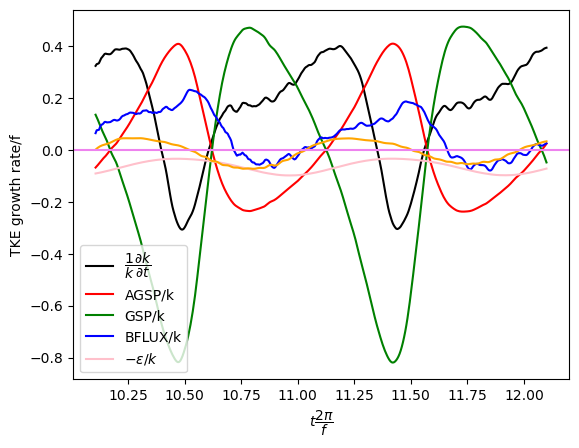

<Figure size 1200x500 with 0 Axes>

In [30]:
ts = 2081
tf = 2481
plt.plot(dkdt.intp[ts:tf],1e4*dkdt[ts:tf]/KE_turb_ip[ts:tf],color="k",label='$\dfrac{1}{k}\dfrac{\partial k}{\partial t}$')
plt.plot(AGSP_spatial_average_time_series_ip.intp[ts:tf],1e4*AGSP_spatial_average_time_series_ip.values[ts:tf]/KE_turb_ip.values[ts:tf],color='red',label='AGSP/k')
plt.plot(GSP_spatial_average_time_series_ip.intp[ts:tf],GSP_spatial_average_time_series_ip.values[ts:tf]/KE_turb_ip.values[ts:tf]*1e4,color='green',label='GSP/k')
plt.plot(BFLUX_spatial_average_time_series_ip.intp[ts:tf],BFLUX_spatial_average_time_series_ip.values[ts:tf]/KE_turb_ip.values[ts:tf]*1e4,color='blue',label='BFLUX/k')
plt.plot(E_spatial_average_time_series_ip.intp[ts:tf],-1*E_spatial_average_time_series_ip.values[ts:tf]/KE_turb_ip.values[ts:tf]*1e4,color='pink',label='$-\epsilon/k$')
plt.plot(PWORK_spatial_average_time_series_ip.intp[ts:tf],1e4*PWORK_spatial_average_time_series_ip.values[ts:tf]/KE_spatial_average_time_series_ip.values[ts:tf],color='orange')
plt.axhline(color="violet")
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("TKE growth rate/f")
plt.legend(loc='lower left')
plt.figure(figsize=(12,5))
plt.show()

In [32]:
eps_spatial_average_time_series = ocean_data.E.mean(dim=['xC','yC','zC'])

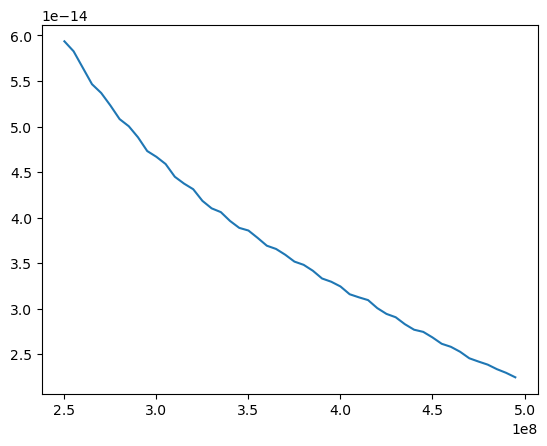

In [33]:
plt.plot(eps_spatial_average_time_series.time[50:100]*(1e-4)/(2*np.pi),eps_spatial_average_time_series.values[50:100])
plt.show()

In [34]:
AGSP_spatial_average_time_series_ip

<xarray.DataArray 'AGSP' (time: 5152)> Size: 41kB
array([ 8.06862474e-15, -6.16196589e-14, -1.01028063e-13, ...,
       -1.91252866e-10, -1.88517820e-10, -1.86065227e-10])
Coordinates:
  * time     (time) timedelta64[ns] 41kB 00:00:00 ... 18 days 04:19:56.350719492
    intp     (time) float64 41kB 0.0 0.005 0.01 0.015 ... 24.99 24.99 25.0 25.0

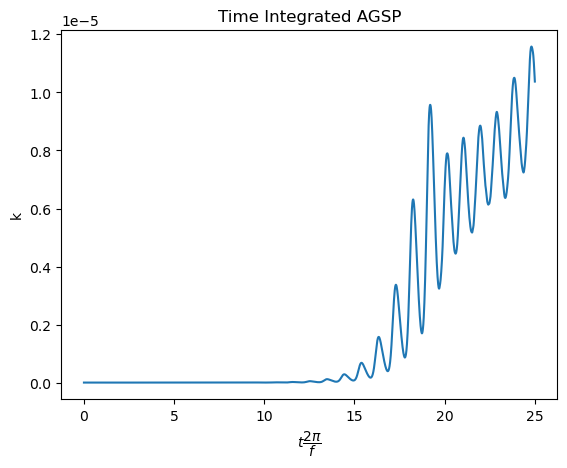

In [53]:
seconds = AGSP_spatial_average_time_series_ip.time/pd.Timedelta("1s")
AGSP_spatial_average_time_series_ip = AGSP_spatial_average_time_series_ip.assign_coords(sec = ('time',seconds.data))
integrated_AGSP = (AGSP_spatial_average_time_series_ip).cumulative_integrate(coord="sec")
plt.plot(integrated_AGSP.intp,integrated_AGSP)
plt.title("Time Integrated AGSP")
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("k")
# plt.yscale('log')
plt.show()

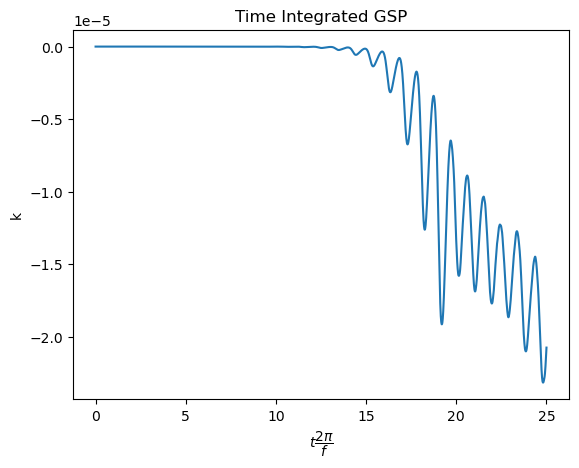

In [36]:
seconds = GSP_spatial_average_time_series_ip.time/pd.Timedelta("1s")
GSP_spatial_average_time_series_ip = GSP_spatial_average_time_series_ip.assign_coords(sec = ('time',seconds.data))
integrated_GSP = (GSP_spatial_average_time_series_ip).cumulative_integrate(coord="sec")
plt.plot(integrated_GSP.intp,integrated_GSP)
plt.title("Time Integrated GSP")
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("k")
# plt.yscale('log')
plt.show()

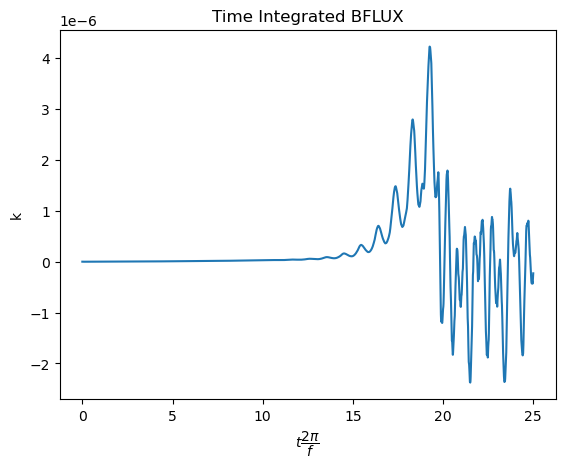

In [37]:
seconds = BFLUX_spatial_average_time_series_ip.time/pd.Timedelta("1s")
BFLUX_spatial_average_time_series_ip = BFLUX_spatial_average_time_series_ip.assign_coords(sec = ('time',seconds.data))
integrated_BFLUX = (BFLUX_spatial_average_time_series_ip).cumulative_integrate(coord="sec")
plt.plot(integrated_BFLUX.intp,integrated_BFLUX)
plt.title("Time Integrated BFLUX")
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("k")
# plt.yscale('log')
plt.show()

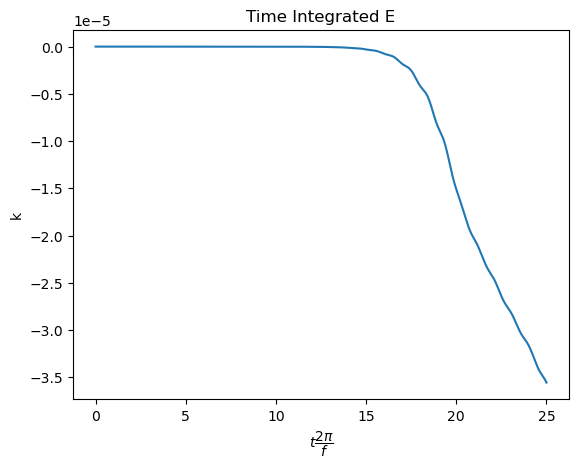

In [38]:
seconds = E_spatial_average_time_series_ip.time/pd.Timedelta("1s")
E_spatial_average_time_series_ip = E_spatial_average_time_series_ip.assign_coords(sec = ('time',seconds.data))
integrated_E = (-1*E_spatial_average_time_series_ip).cumulative_integrate(coord="sec")
plt.plot(integrated_E.intp,integrated_E)
plt.title("Time Integrated E")
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("k")
# plt.yscale('log')
plt.show()

In [39]:
seconds = PWORK_spatial_average_time_series_ip.time/pd.Timedelta("1s")
PWORK_spatial_average_time_series_ip = PWORK_spatial_average_time_series_ip.assign_coords(sec = ('time',seconds.data))
integrated_PWORK = (PWORK_spatial_average_time_series_ip).cumulative_integrate(coord="sec")
integrated_PWORK

<xarray.DataArray 'PWORK' (time: 5152)> Size: 41kB
array([ 0.00000000e+00,  1.18798756e-12,  2.63908650e-12, ...,
       -6.58076131e-06, -6.65728274e-06, -6.73969360e-06])
Coordinates:
  * time     (time) timedelta64[ns] 41kB 00:00:00 ... 18 days 04:19:56.350719492
    intp     (time) float64 41kB 0.0 0.005 0.01 0.015 ... 24.99 24.99 25.0 25.0
    sec      (time) float64 41kB 0.0 314.2 628.3 ... 1.57e+06 1.57e+06 1.571e+06

In [40]:
PWORK_spatial_average_time_series_ip.sec.diff(dim='sec')

<xarray.DataArray 'sec' (time: 5152)> Size: 41kB
array([0.00000000e+00, 3.14159270e+02, 6.28318540e+02, ...,
       1.57016803e+06, 1.57048219e+06, 1.57079635e+06])
Coordinates:
  * time     (time) timedelta64[ns] 41kB 00:00:00 ... 18 days 04:19:56.350719492
    intp     (time) float64 41kB 0.0 0.005 0.01 0.015 ... 24.99 24.99 25.0 25.0
    sec      (time) float64 41kB 0.0 314.2 628.3 ... 1.57e+06 1.57e+06 1.571e+06

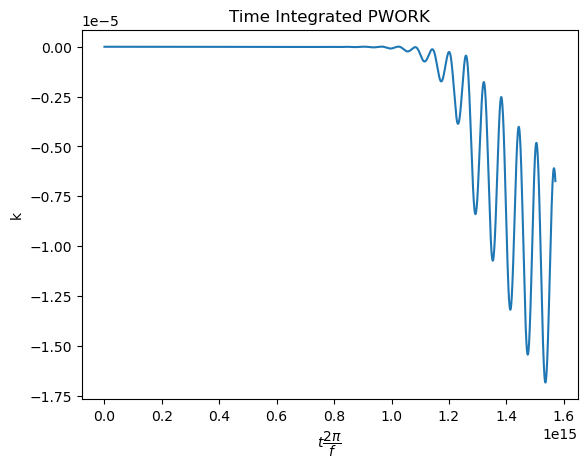

In [41]:
seconds = PWORK_spatial_average_time_series_ip.time/pd.Timedelta("1s")
PWORK_spatial_average_time_series_ip = PWORK_spatial_average_time_series_ip.assign_coords(sec = ('time',seconds.data))
integrated_PWORK = (PWORK_spatial_average_time_series_ip).cumulative_integrate(coord="sec")
plt.plot(integrated_PWORK.time,integrated_PWORK)
plt.title("Time Integrated PWORK")
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("k")
# plt.yscale('log')
plt.show()

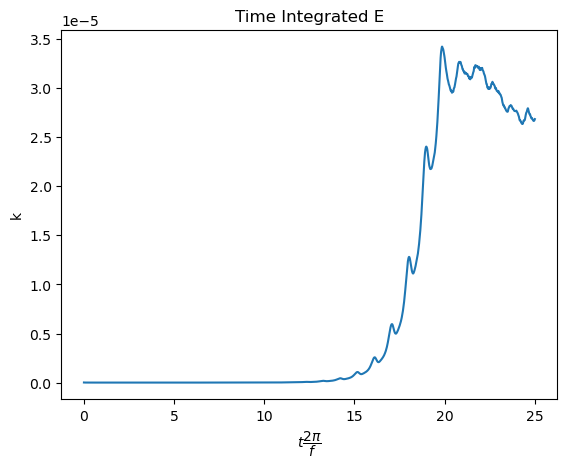

In [42]:
plt.plot(KE_turb_ip.intp,KE_turb_ip)
plt.title("Time Integrated E")
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("k")
# plt.yscale('log')
plt.show()

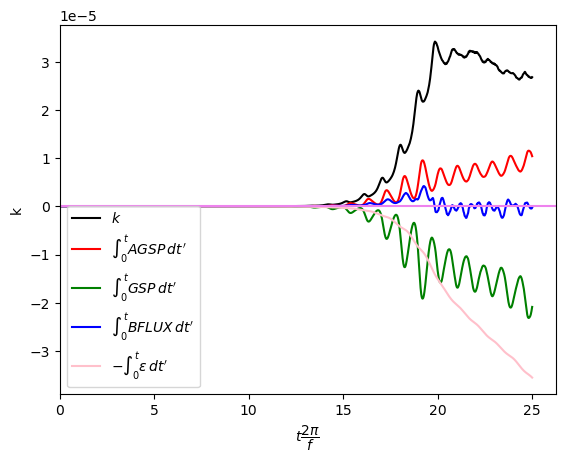

In [50]:
ts = 0
tf = -1
plt.plot(KE_turb_ip.intp[ts:tf],KE_turb_ip[ts:tf],label="$k$",color="k")
plt.plot(integrated_AGSP.intp[ts:tf],integrated_AGSP[ts:tf],label="$\int_0^tAGSP\,dt'$",color="red")
plt.plot(integrated_GSP.intp[ts:tf],integrated_GSP[ts:tf],label="$\int_0^tGSP\,dt'$",color="green")
plt.plot(integrated_BFLUX.intp[ts:tf],integrated_BFLUX[ts:tf],label="$\int_0^tBFLUX\,dt'$",color="blue")
plt.plot(integrated_E.intp[ts:tf],integrated_E[ts:tf],label="$-\int_0^t\epsilon\,dt'$",color="pink")
plt.axhline(color="violet")
# plt.yscale("log")
plt.xlim(left=0)
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("k")
plt.legend(loc=3)
plt.show()

In [44]:
dkdt

<xarray.DataArray 'k' (time: 5152)> Size: 41kB
array([-2.95003970e-12, -3.90135488e-12, -3.60491180e-12, ...,
        8.35168660e-11,  5.54256957e-11,  1.13291492e-11])
Coordinates:
  * time     (time) timedelta64[ns] 41kB 00:00:00 ... 18 days 04:19:56.350719492
    intp     (time) float64 41kB 0.0 0.005 0.01 0.015 ... 24.99 24.99 25.0 25.0
    sec      (time) float64 41kB 0.0 314.2 628.3 ... 1.57e+06 1.57e+06 1.571e+06

In [ ]:
dkdt

In [ ]:
integrated_KE = (dkdt).cumulative_integrate(coord="intp")
plt.plot(integrated_KE.intp,integrated_KE)
plt.title("Time Integrated dkdt")
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("k")
# plt.yscale('log')
plt.show()

In [ ]:
KE_check = ocean_data.k.mean(dim=['xF','yC','zC'])
inertial_period = KE_check.time/pd.Timedelta("1s")*(1e-4)/(2*np.pi)
KE_check_ip = KE_check.assign_coords(intp = ('time',inertial_period.data))
plt.plot(KE_check_ip.intp[0:250],KE_check_ip[0:250])
plt.title("Time Integrated dkdt")
plt.xlabel("$t\dfrac{2\pi}{f}$")
plt.ylabel("k")
# plt.yscale('log')
plt.show()

In [ ]:
da = xr.DataArray(
    np.arange(12).reshape(4, 3),
    dims=["x", "y"],
    coords={"x": [0, 0.1, 1.1, 1.2]},
)
da
da.integrate("x")

In [ ]:
da.cumulative_integrate("x")

In [ ]:
(da*da.x.diff(dim='x')).cumsum("x")*0.5